In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv")
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In [3]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [4]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [5]:
categorical = ['lead_source','industry','employment_status','location']
numerical = ['number_of_courses_viewed','annual_income','interaction_count','lead_score']
target = df.converted

In [6]:
df[categorical] = df[categorical].fillna('NA')
df[numerical]= df[numerical].fillna(0.0)
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


In [7]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [8]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [9]:
X= df.drop('converted',axis=1)
y= df.converted
X_full_train ,X_test , y_full_train , y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train ,X_val , y_train , y_val = train_test_split(X_full_train,y_full_train,test_size=0.25,random_state=1)
len(X_full_train),len(X_train), len(X_val), len(X_test)


(1169, 876, 293, 293)

In [10]:
X_train=X_train.reset_index(drop=True)
X_val=X_val.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
X_full_train=X_full_train.reset_index(drop=True)
X_train

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,events,manufacturing,2,95543.0,unemployed,europe,3,0.78
1,referral,NA,1,54924.0,student,south_america,6,0.39
2,organic_search,healthcare,2,77352.0,unemployed,europe,2,0.22
3,paid_ads,other,2,34600.0,employed,south_america,2,0.31
4,paid_ads,education,0,43615.0,unemployed,south_america,2,0.01
...,...,...,...,...,...,...,...,...
871,NA,other,5,67314.0,NA,europe,2,0.87
872,events,education,6,63996.0,NA,australia,4,0.92
873,organic_search,finance,1,73702.0,unemployed,north_america,2,0.55
874,events,technology,1,93341.0,student,middle_east,4,0.99


In [11]:
from sklearn.metrics import roc_auc_score
for f in numerical:
    score = roc_auc_score(y_train,X_train[f])
    if score <0.5 :
        score = roc_auc_score(y_train,-X_train[f])
    print(f" feature : {f}   score : {score:.2f}")

 feature : number_of_courses_viewed   score : 0.76
 feature : annual_income   score : 0.55
 feature : interaction_count   score : 0.74
 feature : lead_score   score : 0.61


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
dv = DictVectorizer(sparse=False)

train_dict = X_train[categorical+numerical].to_dict(orient="records")
X_trian_encoded = dv.fit_transform(train_dict)

val_dict = X_val[categorical+numerical].to_dict(orient="records")
X_val_encoded = dv.transform(val_dict)



In [13]:
lr.fit(X_trian_encoded,y_train)
y_pred = lr.predict_proba(X_val_encoded)[:, 1]
y_train_pred = lr.predict_proba(X_trian_encoded)[:, 1]
round(roc_auc_score(y_val,y_pred),3), round(roc_auc_score(y_train,y_train_pred),3)

(0.817, 0.834)

In [14]:
from sklearn.metrics import precision_score , recall_score

/workspaces/machine-learning-zoomcamp-homework/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/workspaces/machine-learning-zoomcamp-homework/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/workspaces/machine-learning-zoomcamp-homework/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

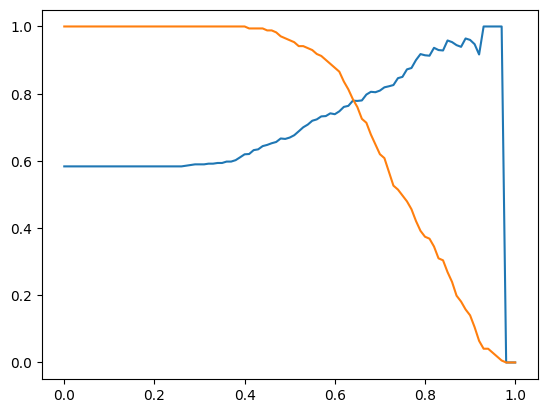

In [15]:
thresholds = np.arange(0, 1.01, 0.01)
precisions = []
recalls = []
lr.fit(X_trian_encoded,y_train)
y_pred = lr.predict_proba(X_val_encoded)[:, 1]
for t in thresholds:
    y_predict= (y_pred >= t)
    precision = precision_score(y_val,y_predict)
    recall = recall_score(y_val,y_predict)
    precisions.append(precision)
    recalls.append(recall)
import matplotlib.pyplot as plt 
plt.plot(thresholds , precisions)
plt.plot(thresholds , recalls)

In [16]:
from sklearn.metrics import f1_score
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = []
for t in thresholds:
    y_predict= (y_pred >= t)
    f1= f1_score(y_val,y_predict)
    f1_scores.append((f1,t))
    print(f" thresholds : {t}   score : {f1:.3f}")


 thresholds : 0.0   score : 0.737
 thresholds : 0.01   score : 0.737
 thresholds : 0.02   score : 0.737
 thresholds : 0.03   score : 0.737
 thresholds : 0.04   score : 0.737
 thresholds : 0.05   score : 0.737
 thresholds : 0.06   score : 0.737
 thresholds : 0.07   score : 0.737
 thresholds : 0.08   score : 0.737
 thresholds : 0.09   score : 0.737
 thresholds : 0.1   score : 0.737
 thresholds : 0.11   score : 0.737
 thresholds : 0.12   score : 0.737
 thresholds : 0.13   score : 0.737
 thresholds : 0.14   score : 0.737
 thresholds : 0.15   score : 0.737
 thresholds : 0.16   score : 0.737
 thresholds : 0.17   score : 0.737
 thresholds : 0.18   score : 0.737
 thresholds : 0.19   score : 0.737
 thresholds : 0.2   score : 0.737
 thresholds : 0.21   score : 0.737
 thresholds : 0.22   score : 0.737
 thresholds : 0.23   score : 0.737
 thresholds : 0.24   score : 0.737
 thresholds : 0.25   score : 0.737
 thresholds : 0.26   score : 0.737
 thresholds : 0.27   score : 0.739
 thresholds : 0.28   sc

In [17]:
from sklearn.model_selection import KFold

kf= KFold(n_splits=5, shuffle=True, random_state=1)
dv = DictVectorizer(sparse=False)

full_train_dict = X_full_train[categorical+numerical].to_dict(orient="records")
X_full_trian_encoded = dv.fit_transform(full_train_dict)

test_dict = X_test[categorical+numerical].to_dict(orient="records")
X_test_encoded = dv.transform(test_dict)

scores = []
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

for train_idx , val_idx in kf.split(X_full_trian_encoded):
    X_trian_kf, X_val_kf = X_full_trian_encoded[train_idx], X_full_trian_encoded[val_idx]
    y_trian_kf, y_val_kf = y_full_train.iloc[train_idx], y_full_train.iloc[val_idx]
    
    model.fit(X_trian_kf,y_trian_kf)
    y_pred= model.predict_proba(X_val_kf)[:, 1]
    score = roc_auc_score(y_val_kf,y_pred)

    scores.append(score)
    print(f"Fold accuracy: {score:.3f}")



Fold accuracy: 0.806
Fold accuracy: 0.871
Fold accuracy: 0.775
Fold accuracy: 0.802
Fold accuracy: 0.856


In [18]:
np.std(scores)

np.float64(0.03580711942905165)

In [19]:
c_values = [0.000001, 0.001, 1]
for c in c_values:
            kf= KFold(n_splits=5, shuffle=True, random_state=1)
            dv = DictVectorizer(sparse=False)

            full_train_dict = X_full_train[categorical+numerical].to_dict(orient="records")
            X_full_trian_encoded = dv.fit_transform(full_train_dict)

            test_dict = X_test[categorical+numerical].to_dict(orient="records")
            X_test_encoded = dv.transform(test_dict)

            scores = []
            model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
            print(f"C: {c}")
            print()

            for train_idx , val_idx in kf.split(X_full_trian_encoded):
                 X_trian_kf, X_val_kf = X_full_trian_encoded[train_idx], X_full_trian_encoded[val_idx]
                 y_trian_kf, y_val_kf = y_full_train.iloc[train_idx], y_full_train.iloc[val_idx]
    
                 model.fit(X_trian_kf,y_trian_kf)
                 y_pred= model.predict_proba(X_val_kf)[:, 1]
                 score = roc_auc_score(y_val_kf,y_pred)

                 scores.append(score)
                 print(f" Fold accuracy: {score:.3f}")
                 print()
            print(f" mean: {np.mean(scores)}  std: {np.std(scores)}")
   
            


C: 1e-06

 Fold accuracy: 0.557

 Fold accuracy: 0.519

 Fold accuracy: 0.589

 Fold accuracy: 0.558

 Fold accuracy: 0.577

 mean: 0.560207852870275  std: 0.023798316620649906
C: 0.001

 Fold accuracy: 0.861

 Fold accuracy: 0.897

 Fold accuracy: 0.823

 Fold accuracy: 0.854

 Fold accuracy: 0.900

 mean: 0.8668780317675395  std: 0.028746230508215103
C: 1

 Fold accuracy: 0.806

 Fold accuracy: 0.871

 Fold accuracy: 0.775

 Fold accuracy: 0.802

 Fold accuracy: 0.856

 mean: 0.8221089148573075  std: 0.03580711942905165
